In [14]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pygrib


def grb_to_da(grb):
    
    # extract data from grb message
    values = grb.values[np.newaxis, ...]
    lat, lon = grb.latlons()
    t = np.array(grb.validDate)[..., np.newaxis]
    analysis_date = grb.analDate
    parameter = grb.parameterName
    unit = grb.parameterUnits
    
    # create data array
    da = xr.DataArray(data=values,
                  dims=["time", "y", "x"],
                  coords=dict(
                      lon=(["y", "x"], lon),
                      lat=(["y", "x"], lat),
                      time=t
                      ),
                  attrs=dict(
                      paramter=parameter,
                      unit=unit,
                      analysis_date=analysis_date)
                 )
    return da


def create_forecast_cube(grbs):
    """iterate through grb messages in a grib file, 
        create data arrays for each timestamp, 
        and concatenate them togeher into a 3D data array"""
    arrays = list()

    for grb in grbs:
        da = grb_to_da(grb)
        arrays.append(da)

    forecast_cube = xr.concat(arrays, dim="time")
    return forecast_cube

# https://vlab.noaa.gov/web/mdl/ndfd-grid-data

In [2]:
# download the forecast grib file
!wget 'https://noaa-ndfd-pds.s3.amazonaws.com/opnl/AR.conus/VP.001-003/ds.temp.bin' -O forecast.bin

--2022-03-11 08:18:01--  https://noaa-ndfd-pds.s3.amazonaws.com/opnl/AR.conus/VP.001-003/ds.temp.bin
Resolving noaa-ndfd-pds.s3.amazonaws.com (noaa-ndfd-pds.s3.amazonaws.com)... 52.217.69.92
Connecting to noaa-ndfd-pds.s3.amazonaws.com (noaa-ndfd-pds.s3.amazonaws.com)|52.217.69.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 43955798 (42M) [application/octet-stream]
Saving to: ‘forecast.bin’

forecast.bin        100%[===================>]  41.92M  7.19MB/s    in 6.8s    

2022-03-11 08:18:10 (6.15 MB/s) - ‘forecast.bin’ saved [43955798/43955798]



In [4]:
grbs = pygrib.open('forecast.bin')
grbs.seek(0)
for grb in grbs:
    print(grb)

1:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 1 hrs:from 202203111500
2:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 2 hrs:from 202203111500
3:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 3 hrs:from 202203111500
4:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 4 hrs:from 202203111500
5:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 5 hrs:from 202203111500
6:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 6 hrs:from 202203111500
7:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 7 hrs:from 202203111500
8:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 8 hrs:from 202203111500
9:2 metre temperature:K (instant):lambert:heightAboveGround:level 2 m:fcst time 9 hrs:from 202203111500
10:2 metre temperature:K (instant):lambert:heightAboveGround:lev

In [39]:
grbs.seek(0)
forecast_cube = create_forecast_cube(grbs)
forecast_cube

<xarray.DataArray (time: 43, y: 1377, x: 2145)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]])
Coordinates:
    lon      (y, x) float64 -121.6 -121.5 -121.5 -121.5 ... -60.95 -60.92 -60.89
    lat      (y, x) float64 20.19 20.2 20.2 20.21 ... 50.12 50.12 50.11 50.11
  * time     (time) datetime64[ns] 2022-03-11T16:00:00 ... 2022-03-14
Dimensions without coordinates: y, x
Attributes:
    paramter:       Temperature
    unit:           K
    analysis_date:  2022-03-11 15:00:00

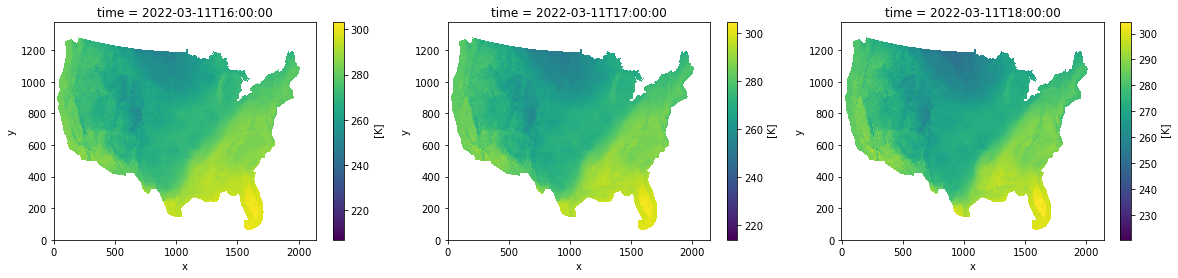

In [17]:
fig, axes = plt.subplots(ncols=3, figsize=(20,4))
for i, ax in enumerate(axes):
    forecast_cube.isel(time=i).plot(ax=ax)

In [18]:
forecast_cube.shape

(43, 1377, 2145)

In [27]:
forecast_cube.sel(lat=39.560, lon=-104.848)

KeyError: 'no index found for coordinate lat'

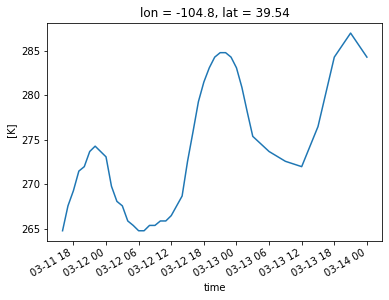

In [38]:
forecast_cube.sel(x=745, y=760).plot()

In [68]:
grb.keys()

['globalDomain',
 'GRIBEditionNumber',
 'tablesVersionLatestOfficial',
 'tablesVersionLatest',
 'grib2divider',
 'is_efas',
 'angleSubdivisions',
 'missingValue',
 'ieeeFloats',
 'isHindcast',
 'section0Length',
 'identifier',
 'discipline',
 'editionNumber',
 'totalLength',
 'sectionNumber',
 'section1Length',
 'numberOfSection',
 'centre',
 'centreDescription',
 'subCentre',
 'tablesVersion',
 'masterDir',
 'localTablesVersion',
 'significanceOfReferenceTime',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'dataDate',
 'julianDay',
 'dataTime',
 'productionStatusOfProcessedData',
 'typeOfProcessedData',
 'md5Section1',
 'selectStepTemplateInterval',
 'selectStepTemplateInstant',
 'stepType',
 'is_chemical',
 'is_chemical_distfn',
 'is_chemical_srcsink',
 'is_aerosol',
 'is_aerosol_optical',
 'setCalendarId',
 'deleteCalendarId',
 'is_uerra',
 'sectionNumber',
 'grib2LocalSectionPresent',
 'deleteLocalDefinition',
 'sectionNumber',
 'gridDescriptionSectionPresent',
 'secti

In [71]:
grb.Dx

2539703

In [13]:
grb.parameterUnits

'K'

In [64]:
grb.parameterName

'Temperature'

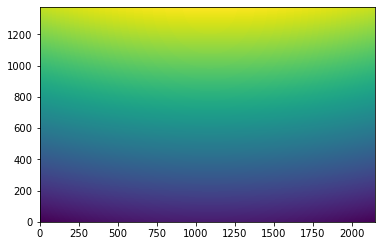

In [30]:
lat, lon = grb.latlons()
plt.imshow(lat, origin='lower')

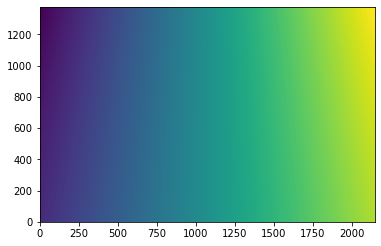

In [31]:
plt.imshow(lon, origin='lower')